# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [14]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: import the augmento_btc dataset into a Pandas DataFrame.

In [15]:
# Import the OHLCV dataset into a Pandas Dataframe
agmtoS_df = pd.read_csv(
    Path("./Rsrc-augmento/augmento_btc.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
agmtoS_df.head()

,listing_close,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,twitter_leverage,...,reddit_buying,reddit_warning,reddit_annoyed_frustrated,reddit_price,reddit_use_case_applications,reddit_rumor,reddit_scam_fraud,reddit_airdrop,reddit_optimistic,reddit_negative
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,706.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,6.0,2.0,0.0,0.0,0.0,1.0,12.0
2016-11-01 02:00:00,709.99,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,1.0,8.0
2016-11-01 03:00:00,708.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,7.0
2016-11-01 04:00:00,702.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,5.0
2016-11-01 05:00:00,708.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,1.0,7.0


In [18]:
agmtoS_df.value_counts()

listing_close  twitter_hacks  twitter_pessimistic_doubtful  twitter_banks  twitter_selling  twitter_market_manipulation  twitter_de_centralisation  twitter_angry  twitter_etf  twitter_leverage  twitter_bottom  twitter_institutional_money  twitter_fomo  twitter_prediction  twitter_adoption  twitter_fearful_concerned  twitter_portfolio  twitter_fud_theme  twitter_whitepaper  twitter_announcements  twitter_technical_analysis  twitter_flippening  twitter_community  twitter_investing_trading  twitter_euphoric_excited  twitter_hodling  twitter_ico  twitter_bearish  twitter_going_short  twitter_uncertain  twitter_volume  twitter_risk  twitter_governance  twitter_ban  twitter_cheap  twitter_short_term_trading  twitter_fork  twitter_progress  twitter_shilling  twitter_bullish  twitter_happy  twitter_bubble  twitter_bots  twitter_hopeful  twitter_bug  twitter_open_source  twitter_token_economics  twitter_security  twitter_marketing  twitter_bad_news  twitter_due_diligence  twitter_team  twitter_

In [13]:
# Filter the date index and close columns
signals_df = agmtoS_df.loc[:, ["listing_close"]]

# Use the pct_change function to generate  returns from close prices
signals_df["Actual Returns"] = signals_df["listing_close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,listing_close,Actual Returns
date,,
2016-11-01 02:00:00,709.99,0.005652
2016-11-01 03:00:00,708.54,-0.002042
2016-11-01 04:00:00,702.85,-0.008031
2016-11-01 05:00:00,708.50,0.008039
2016-11-01 06:00:00,709.30,0.001129


,listing_close,Actual Returns
date,,
2022-04-19 15:00:00,41462.12,-0.003093
2022-04-19 16:00:00,41351.46,-0.002669
2022-04-19 17:00:00,41358.08,0.000160
2022-04-19 18:00:00,41401.91,0.001060
2022-04-19 19:00:00,41444.08,0.001019


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [6]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['listing_close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['listing_close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,listing_close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2016-11-05 05:00:00,701.37,-0.001424,701.7000,715.8513
2016-11-05 06:00:00,702.78,0.002010,702.1875,715.7792
2016-11-05 07:00:00,702.00,-0.001110,702.1300,715.7138
2016-11-05 08:00:00,704.94,0.004188,702.7725,715.7347
2016-11-05 09:00:00,704.95,0.000014,703.6675,715.6992


,listing_close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2022-04-19 15:00:00,41462.12,-0.003093,41365.7925,40277.6727
2022-04-19 16:00:00,41351.46,-0.002669,41460.6225,40289.5654
2022-04-19 17:00:00,41358.08,0.000160,41440.6000,40302.5403
2022-04-19 18:00:00,41401.91,0.001060,41393.3925,40311.9825
2022-04-19 19:00:00,41444.08,0.001019,41388.8825,40322.0611


In [5]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [6]:
signals_df['Signal'].value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [7]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


<AxesSubplot:title={'center':'Strategy Returns: SMA 4/100'}, xlabel='date'>

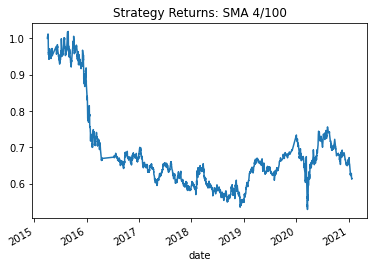

In [8]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot(title="Strategy Returns:")

### Step 3: Split the data into training and testing datasets.

In [9]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [10]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

 1.0    2368
-1.0    1855
Name: Signal, dtype: int64

In [11]:
# Select the start of the training period
training_begin = X.index.min() 
#training_begin = X.index.loc[2018-11-22:]
#training_begin = X.index[datetime.datetime(2018, 11, 22):] #datetime.datetime(2020, 11, 20)]

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [12]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)
#training_end = X.index.min() + DateOffset(months=6)
#training_end = X.index.min() + DateOffset(years=1) 

# Display the training end date
print(training_end)

2015-07-02 15:00:00


In [13]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [14]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [15]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [16]:
# From SVM, instantiate SVC classifier model instance
svc_model = svm.SVC()
 
# Fit the model to the data using the training data
svc_model = svc_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svc_pred = svc_model.predict(X_test_scaled)

# Review the model's predicted values
svc_pred[:50]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [17]:
# Use a classification report to evaluate the model using the predictions and testing data
svc_testing_report = classification_report(y_test, svc_pred)

# Print the classification report
print("SVC Classification Report:3Mos- SMA 4/100")
print(svc_testing_report)


SVC Classification Report:3Mos- SMA 4/100
              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [18]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
svc_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
svc_predictions_df['Predicted'] = svc_pred

# Add the actual returns to the DataFrame
svc_predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
svc_predictions_df['Strategy Returns'] = svc_predictions_df['Actual Returns'] * svc_predictions_df['Predicted'] 

# Review the DataFrame
#display(predictions_df.head(15))
#display(predictions_df.tail(15))
svc_predictions_df

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-07-06 10:00:00,1.0,-0.025715,-0.025715
2015-07-06 10:45:00,1.0,0.007237,0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721
2015-07-06 14:30:00,1.0,-0.003841,-0.003841
2015-07-07 11:30:00,1.0,-0.018423,-0.018423
...,...,...,...
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [19]:
# Plot the actual returns versus the strategy returns
(1 + svc_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().hvplot(
                            title="SVC Cumulative Rtns: 3Mos- SMA 4/100")


:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [20]:
svc_cr3M4100 = (1+ svc_predictions_df[['Actual Returns','Strategy Returns']]).cumprod()
svc_cr3M4100.tail()

,Actual Returns,Strategy Returns
date,,
2021-01-22 09:30:00,1.379925,1.509892
2021-01-22 11:30:00,1.383243,1.513523
2021-01-22 13:45:00,1.386147,1.516700
2021-01-22 14:30:00,1.388221,1.518969
2021-01-22 15:45:00,1.386976,1.517607


---

## Tune the Baseline Trading Algorithm

## Step 6: Use an Alternative ML Model and Evaluate Strategy Returns

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [21]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Initiate the model instance
logistic_regression_model = LogisticRegression()
adaBoost_model = AdaBoostClassifier() 
decisionTree_model = DecisionTreeClassifier()

### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [22]:
# Fit the LogisticRegression model using the training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
lr_pred = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
lr_pred[:50]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# Fit the AdaBoost model using the training data
ab_model = adaBoost_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
ab_pred = adaBoost_model.predict(X_test_scaled)

# Review the model's predicted values
ab_pred[:50]


array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [24]:
# Fit the AdaBoost model using the training data
dt_model = decisionTree_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
dt_pred = decisionTree_model.predict(X_test_scaled)

# Review the model's predicted values
dt_pred[:50]

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [25]:
# Use a classification report to evaluate the model using the predictions and testing data
lr_testing_report = classification_report(y_test, lr_pred)
ab_testing_report = classification_report(y_test, ab_pred)
dt_testing_report = classification_report(y_test, dt_pred) 
# Print the classification report
print("LogisticRegress Classification Report:3Mos- SMA 4/100")
print(lr_testing_report) 
print("AdaBoostClassifier Report:3Mos- SMA 4/100")
print(ab_testing_report)
print("DecisionTree Classifier Report:3Mos- SMA 4/100")
print(dt_testing_report)

LogisticRegress Classification Report:3Mos- SMA 4/100
              precision    recall  f1-score   support

        -1.0       0.44      0.33      0.38      1804
         1.0       0.56      0.66      0.61      2288

    accuracy                           0.52      4092
   macro avg       0.50      0.50      0.49      4092
weighted avg       0.51      0.52      0.51      4092

AdaBoostClassifier Report:3Mos- SMA 4/100
              precision    recall  f1-score   support

        -1.0       0.44      0.08      0.13      1804
         1.0       0.56      0.92      0.70      2288

    accuracy                           0.55      4092
   macro avg       0.50      0.50      0.41      4092
weighted avg       0.51      0.55      0.45      4092

DecisionTree Classifier Report:3Mos- SMA 4/100
              precision    recall  f1-score   support

        -1.0       0.44      0.85      0.58      1804
         1.0       0.54      0.14      0.22      2288

    accuracy                           

In [26]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
lr_predictions_df = pd.DataFrame(index=X_test.index)
ab_predictions_df = pd.DataFrame(index=X_test.index)
dt_predictions_df = pd.DataFrame(index=X_test.index)
# Add the LogisticRegression(lr) model predictions to the DataFrame
lr_predictions_df['Predicted'] = lr_pred

# Add the AdaBoost(ab) model predictions to the DataFrame
ab_predictions_df['Predicted'] = ab_pred 

# Add the DecisionTree(dt) model predictions to the DataFrame
dt_predictions_df['Predicted'] = dt_pred

In [27]:
# Add the actual returns to the DataFrame
lr_predictions_df['Actual Returns'] = signals_df['Actual Returns'] 
ab_predictions_df['Actual Returns'] = signals_df['Actual Returns'] 
dt_predictions_df['Actual Returns'] = signals_df['Actual Returns'] 

In [28]:
# Add the strategy returns to the DataFrame
lr_predictions_df['Strategy Returns'] = lr_predictions_df['Actual Returns'] * lr_predictions_df['Predicted'] 
ab_predictions_df['Strategy Returns'] = ab_predictions_df['Actual Returns'] * ab_predictions_df['Predicted']
dt_predictions_df['Strategy Returns'] = dt_predictions_df['Actual Returns'] * dt_predictions_df['Predicted']

In [29]:
# Review the DataFrame
lr_predictions_df, ab_predictions_df, dt_predictions_df

(                     Predicted  Actual Returns  Strategy Returns
 date                                                            
 2015-07-06 10:00:00        1.0       -0.025715         -0.025715
 2015-07-06 10:45:00        1.0        0.007237          0.007237
 2015-07-06 14:15:00        1.0       -0.009721         -0.009721
 2015-07-06 14:30:00        1.0       -0.003841         -0.003841
 2015-07-07 11:30:00        1.0       -0.018423         -0.018423
 ...                        ...             ...               ...
 2021-01-22 09:30:00       -1.0       -0.006866          0.006866
 2021-01-22 11:30:00       -1.0        0.002405         -0.002405
 2021-01-22 13:45:00       -1.0        0.002099         -0.002099
 2021-01-22 14:30:00       -1.0        0.001496         -0.001496
 2021-01-22 15:45:00       -1.0       -0.000896          0.000896
 
 [4092 rows x 3 columns],
                      Predicted  Actual Returns  Strategy Returns
 date                                           

<AxesSubplot:title={'center':'Logistic Regress Cumulative Rtns: 3Mos- SMA 4/100'}, xlabel='date'>

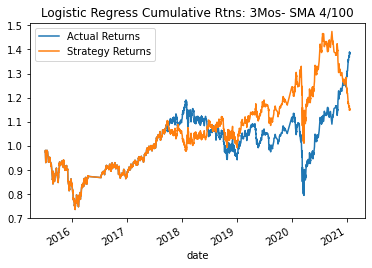

In [30]:
# Plot the actual returns versus the 'lr' strategy returns
lr_plot = (1 + lr_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
                        title="Logistic Regress Cumulative Rtns: 3Mos- SMA 4/100")
lr_plot

In [31]:
lr_cr3M4100 = (1+ lr_predictions_df[['Actual Returns','Strategy Returns']]).cumprod()
lr_cr3M4100.tail()

,Actual Returns,Strategy Returns
date,,
2021-01-22 09:30:00,1.379925,1.155177
2021-01-22 11:30:00,1.383243,1.152399
2021-01-22 13:45:00,1.386147,1.149980
2021-01-22 14:30:00,1.388221,1.148260
2021-01-22 15:45:00,1.386976,1.149289


<AxesSubplot:title={'center':'AdaBoost Cumulative Rtns: 3Mos- SMA 4/100'}, xlabel='date'>

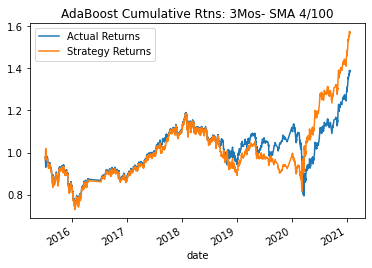

In [32]:
# Plot the actual returns versus the strategy 'ab' returns
ab_plot = (1 + ab_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
                        title="AdaBoost Cumulative Rtns: 3Mos- SMA 4/100") 
ab_plot

In [33]:
ab_cr3M4100 = (1+ ab_predictions_df[['Actual Returns','Strategy Returns']]).cumprod()
ab_cr3M4100.tail()

,Actual Returns,Strategy Returns
date,,
2021-01-22 09:30:00,1.379925,1.562834
2021-01-22 11:30:00,1.383243,1.566592
2021-01-22 13:45:00,1.386147,1.569880
2021-01-22 14:30:00,1.388221,1.572229
2021-01-22 15:45:00,1.386976,1.570820


<AxesSubplot:title={'center':'DecisionTree Cumulative Rtns: 3Mos- SMA 4/100'}, xlabel='date'>

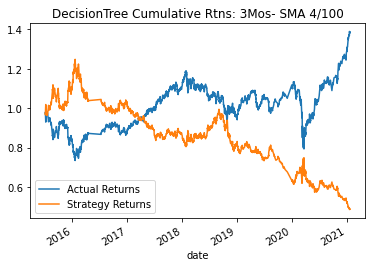

In [34]:
# Plot the actual returns versus the 'dt' strategy returns
(1 + dt_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
                        title="DecisionTree Cumulative Rtns: 3Mos- SMA 4/100")


In [35]:
dt_cr3M4100 = (1+ dt_predictions_df[['Actual Returns','Strategy Returns']]).cumprod()
dt_cr3M4100.tail()

,Actual Returns,Strategy Returns
date,,
2021-01-22 09:30:00,1.379925,0.490990
2021-01-22 11:30:00,1.383243,0.489810
2021-01-22 13:45:00,1.386147,0.488782
2021-01-22 14:30:00,1.388221,0.488050
2021-01-22 15:45:00,1.386976,0.488488
